In [2]:
# Basic system imports
import os, sys, traceback, re
from time import strftime, gmtime, localtime
from datetime import timedelta
from collections import defaultdict, OrderedDict, Counter
from math import ceil
from StringIO import StringIO
# important/useful modules
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import urllib2
from random import uniform
# SQL Stuff
from sqlalchemy import create_engine
import MySQLdb
import psycopg2
import sqlite3
# ml modules
import sklearn
import statsmodels
from patsy import dmatrices
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, Imputer
# setting up notebook
reload(sys)  
sys.setdefaultencoding('utf8') 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('precision', 5)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_colwidth', 500) 
from pandasql import *
def pysqldf(q):
    return sqldf(q, globals())

### Sonar Rocks vs Mines

In [97]:
# ICS UCI Machine Learning, Sonar Data
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases"
              "/undocumented/connectionist-bench/sonar/sonar.all-data")

raw_data = urllib2.urlopen(target_url)
raw_data_str =raw_data.read()
# data = pd.read_csv(StringIO(unicode(raw_data_str)), header=None)
rocksVMines = pd.read_csv(target_url, header=None, prefix="V")

In [98]:
rocksVMines.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59
count,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000
mean,0.02916,0.03844,0.04383,0.05389,0.07520,0.10457,0.12175,0.13480,0.17800,0.20826,0.23601,0.25022,0.27331,0.29657,0.32020,0.37849,0.41598,0.45232,0.50481,0.56305,0.60906,0.62428,0.64698,0.67265,0.67542,0.69987,0.70215,0.69402,0.64207,0.58093,0.50448,0.43904,0.41722,0.40323,0.39257,0.38485,0.36381,0.33966,0.32580,0.31121,0.28925,0.27829,0.24654,0.21408,0.19723,0.16063,0.12245,0.09142,0.05193,0.02042,0.01607,0.01342,0.01071,0.01094,0.00929,0.00822,0.00782,0.00795,0.00794,0.00651
std,0.02299,0.03296,0.03843,0.04653,0.05555,0.05911,0.06179,0.08515,0.11839,0.13442,0.13270,0.14007,0.14096,0.16447,0.20543,0.23265,0.26368,0.26153,0.25799,0.26265,0.25782,0.25588,0.25018,0.23912,0.24493,0.23723,0.24566,0.23719,0.24025,0.22075,0.21399,0.21324,0.20651,0.23124,0.25913,0.26412,0.23991,0.21297,0.19907,0.17866,0.17111,0.16873,0.13899,0.13329,0.15163,0.13394,0.08695,0.06242,0.03595,0.01367,0.01201,0.00963,0.00706,0.00730,0.00709,0.00574,0.00579,0.00647,0.00618,0.00503
min,0.00150,0.00060,0.00150,0.00580,0.00670,0.01020,0.00330,0.00550,0.00750,0.01130,0.02890,0.02360,0.01840,0.02730,0.00310,0.01620,0.03490,0.03750,0.04940,0.06560,0.05120,0.02190,0.05630,0.02390,0.02400,0.09210,0.04810,0.02840,0.01440,0.06130,0.04820,0.04040,0.04770,0.02120,0.02230,0.00800,0.03510,0.03830,0.03710,0.01170,0.03600,0.00560,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00080,0.00050,0.00100,0.00060,0.00040,0.00030,0.00030,0.00010,0.00060
25%,0.01335,0.01645,0.01895,0.02438,0.03805,0.06703,0.08090,0.08042,0.09703,0.11127,0.12925,0.13348,0.16613,0.17517,0.16462,0.19630,0.20585,0.24208,0.29907,0.35063,0.39972,0.40692,0.45023,0.54073,0.52580,0.54417,0.53190,0.53478,0.46370,0.41140,0.34555,0.28140,0.25788,0.21757,0.17938,0.15435,0.16010,0.17428,0.17397,0.18645,0.16310,0.15890,0.15520,0.12688,0.09447,0.06855,0.06425,0.04512,0.02635,0.01155,0.00843,0.00728,0.00508,0.00537,0.00415,0.00440,0.00370,0.00360,0.00368,0.00310
50%,0.02280,0.03080,0.03430,0.04405,0.06250,0.09215,0.10695,0.11210,0.15225,0.18240,0.22480,0.24905,0.26395,0.28110,0.28170,0.30470,0.30840,0.36830,0.43495,0.54250,0.61770,0.66490,0.69970,0.69850,0.72110,0.75450,0.74560,0.73190,0.68080,0.60715,0.49035,0.42960,0.39120,0.35105,0.31275,0.32115,0.30630,0.31270,0.28350,0.27805,0.25950,0.24510,0.22255,0.17770,0.14800,0.12135,0.10165,0.07810,0.04470,0.01790,0.01390,0.01140,0.00955,0.00930,0.00750,0.00685,0.00595,0.00580,0.00640,0.00530
75%,0.03555,0.04795,0.05795,0.06450,0.10028,0.13412,0.15400,0.16960,0.23342,0.26870,0.30165,0.33125,0.35125,0.38618,0.45293,0.53573,0.65943,0.67905,0.73140,0.80932,0.81698,0.83198,0.84857,0.87218,0.87372,0.89380,0.91710,0.90028,0.85213,0.73518,0.64195,0.58030,0.55612,0.59613,0.59335,0.55652,0.51890,0.44055,0.43490,0.42435,0.38753,0.38425,0.32453,0.27175,0.23155,0.20038,0.15442,0.12010,0.06853,0.02528,0.02082,0.01673,0.01490,0.01450,0.01210,0.01058,0.01043,0.01035,0.01033,0.00853
max,0.13710,0.23390,0.30590,0.42640,0.40100,0.38230,0.37290,0.45900,0.68280,0.71060,0.73420,0.70600,0.71310,0.99700,1.00000,0.99880,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.96570,0.9306

In [100]:
rocksVMines['V60'].value_counts()

M    111
R     97
Name: V60, dtype: int64

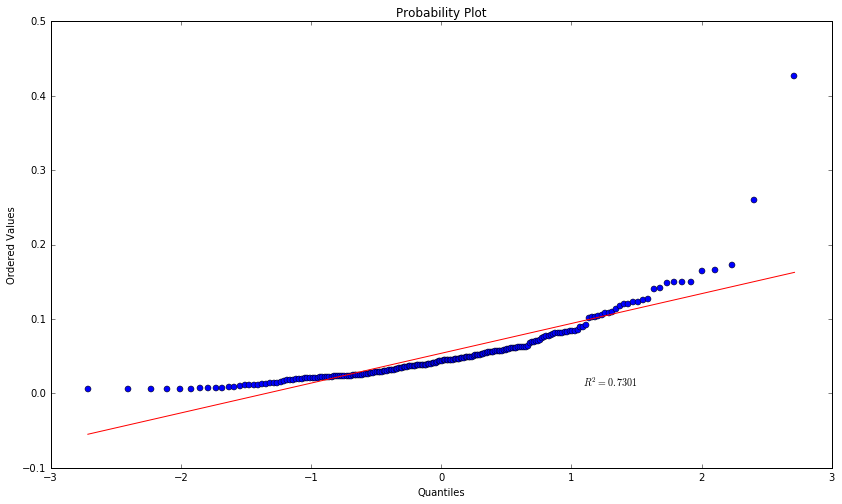

In [101]:
plt.figure(figsize=(14, 8))
stats.probplot(rocksVMines['V3'].values.tolist(), dist="norm", plot=plt)
plt.show()

## (pairwise correlations > 0.7) is known as multicollinearity and is bad!!! 

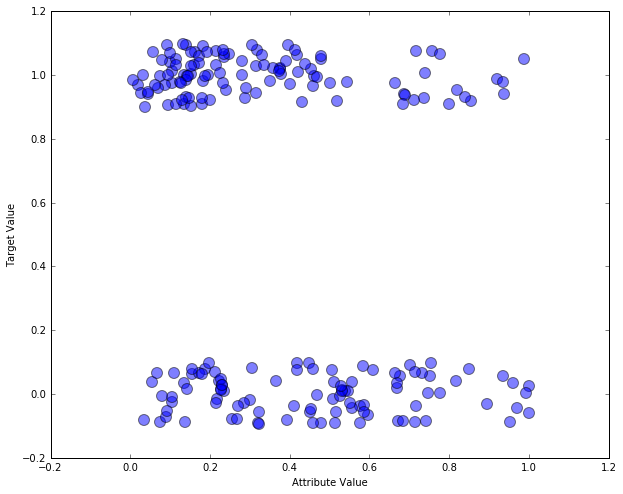

In [106]:
# Plot the 35th column and see how it's dispersed over the class
target = []
for i in range(208):
    # assign 0 or 1 target value based on "M" or "R" labels
    # and add some dither
    if rocksVMines.iat[i,60] == "M":
        target.append(1.0 + uniform(-0.1, 0.1))
    else:
        target.append(0.0 + uniform(-0.1, 0.1))
    # plot 35th attribute with semi-opaque points
dataRow = rocksVMines.iloc[0:208, 35]
plt.figure(figsize=(10,8))
plt.scatter(dataRow, target, alpha=0.5, s=120)
plt.xlabel("Attribute Value")
plt.ylabel("Target Value")
plt.show()

### Abalone 

In [ ]:
plt.boxplot()

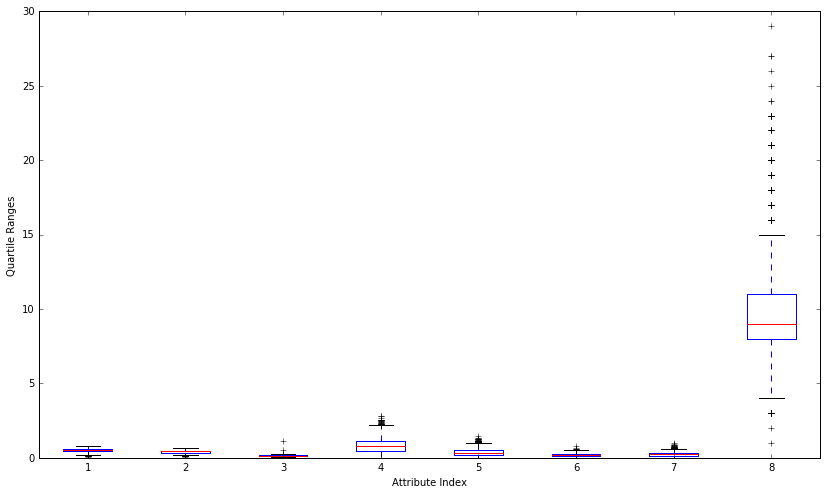

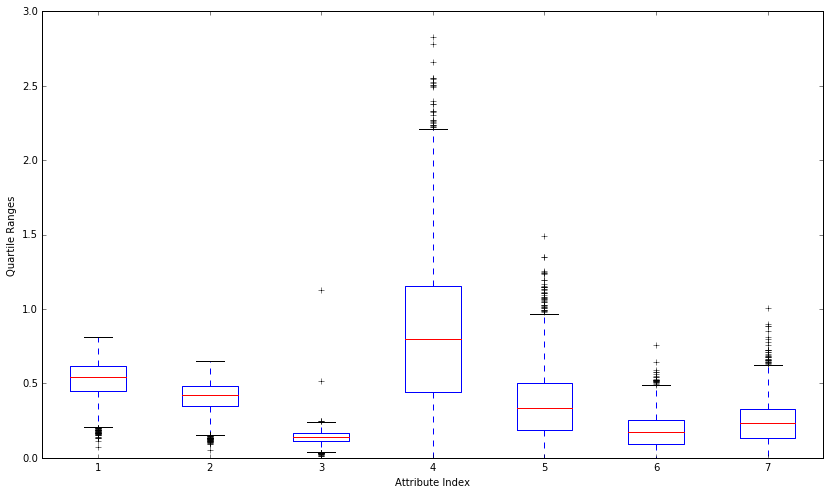

In [83]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
#read abalone data
abalone = pd.read_csv(target_url,header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 
                   'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
# print summary of data frame
summary = abalone.describe()
print(summary)
# box plot the real-valued attributes
# convert to array for plot routine
array = abalone.iloc[:, 1:9].values # plot length to the number of rings
plt.figure(figsize=(14, 8))
plt.boxplot(array)
plt.xlabel("Attribute Index")
plt.ylabel(("Quartile Ranges"))
plt.show()
# the last column (rings) is out of scale with the rest
# - remove and replot
array2 = abalone.iloc[:, 1:8].values # exclude the number of rings
plt.figure(figsize=(14, 8))
plt.boxplot(array2)
plt.xlabel("Attribute Index")
plt.ylabel(("Quartile Ranges"))
plt.show()

Can see that there are outliers in the graph based on the values beyond the edges of the whiskers. Removing these values is okay but renormalizing the variables generalizes better. Therefore we will renormalize columns to zero mean and unit standard deviation this is a common normalization and desirable for other operations (like k-means clustering or k-nearest neighbors)

In [77]:
?matplotlib.pyplot

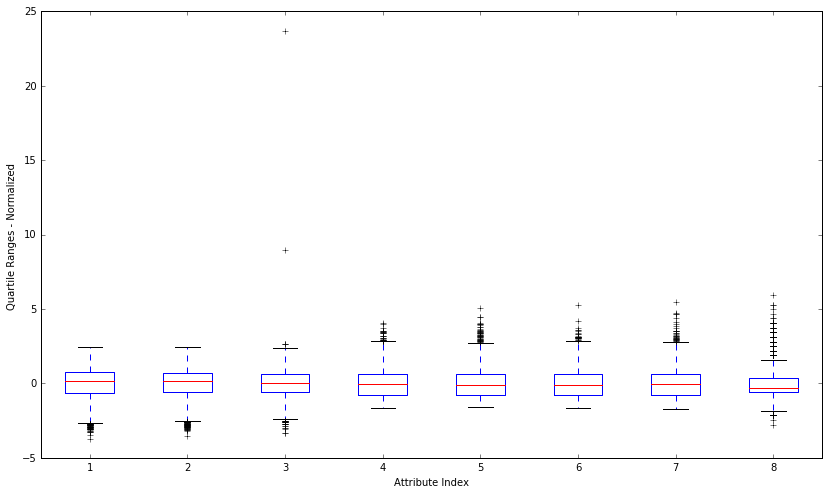

In [80]:
abaloneNormalized = abalone.iloc[:,1:9]
for i in range(8):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    abaloneNormalized.iloc[:, i:(i + 1)] = (abaloneNormalized.iloc[:, i:(i + 1)] - mean) / sd
array3 = abaloneNormalized.values
plt.figure(figsize=(14, 8))
plt.boxplot(array3)
# plt.fig_size(10, 8)

plt.xlabel("Attribute Index")
plt.ylabel(("Quartile Ranges - Normalized "))
plt.show()

Now looking at the relationship between the variables using a parallel coordinates plot

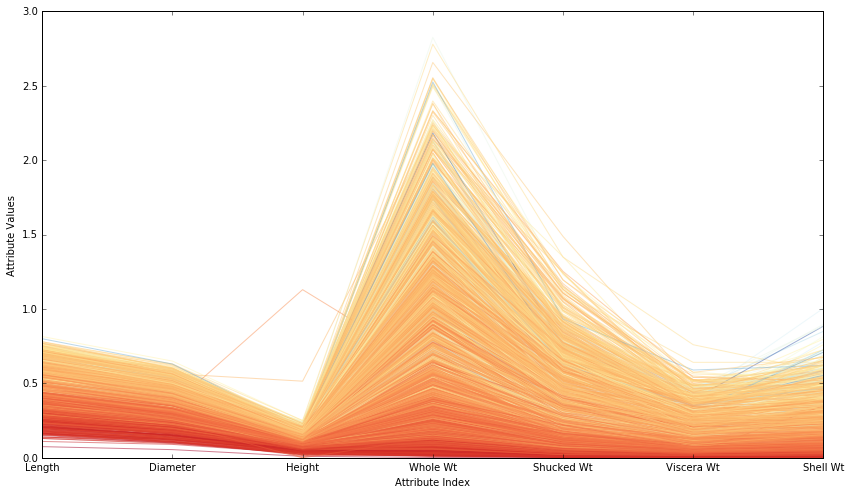

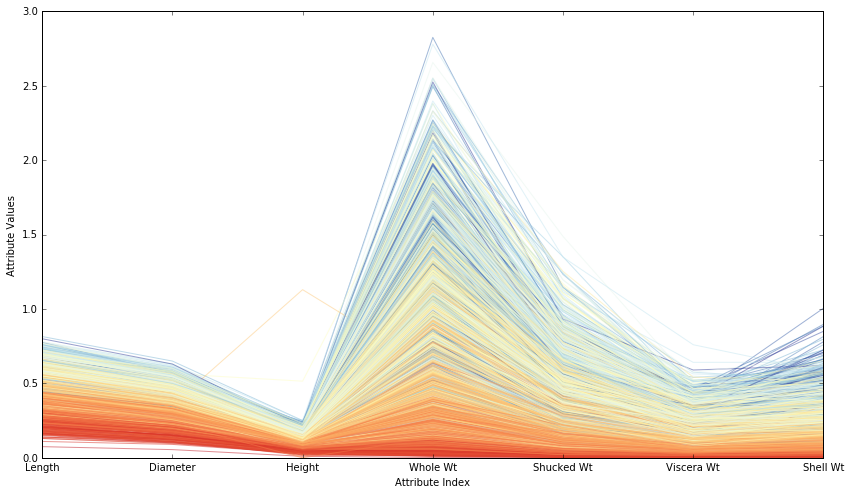

In [81]:
from math import exp
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
#read abalone data
abalone = pd.read_csv(target_url,header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Wt', 'Shucked Wt', 
                   'Viscera Wt', 'Shell Wt', 'Rings']
#get summary to use for scaling
summary = abalone.describe()
minRings = summary.iloc[3,7]
maxRings = summary.iloc[7,7]
nrows = len(abalone.index)
plt.figure(figsize=(14, 8))
for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = abalone.iloc[i,1:8]
    labelColor = (abalone.iloc[i,8] - minRings) / (maxRings - minRings)
    dataRow.plot(color=plt.cm.RdYlBu(labelColor), alpha=0.5, figsize=(14, 8))
plt.xlabel("Attribute Index")
plt.ylabel(("Attribute Values"))
plt.show()
#renormalize using mean and standard variation, then compress
# with logit function
meanRings = summary.iloc[1,7]
sdRings = summary.iloc[2,7]
for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = abalone.iloc[i,1:8]
    normTarget = (abalone.iloc[i,8] - meanRings)/sdRings
    labelColor = 1.0/(1.0 + exp(-normTarget))
    dataRow.plot(color=plt.cm.RdYlBu(labelColor), alpha=0.5, figsize=(14, 8))
plt.xlabel("Attribute Index")
plt.ylabel(("Attribute Values"))
plt.show()

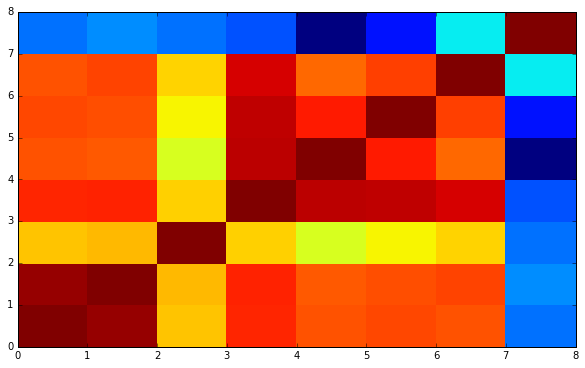

In [95]:
# calculate correlation matrix
corMat = pd.DataFrame(abalone.iloc[:, 1:9].corr())
# print correlation matrix
print(corMat)
# visualize correlations using heatmap
plt.figure(figsize=(10,6))
plt.pcolor(corMat)
plt.show()

### Glass Data (mulit class classification)

In [86]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data")
glass = pd.read_csv(target_url, header=None)
glass.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
print(glass.head())
#generate statistical summaries
summary = glass.describe()
summary

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000
mean,107.50000,1.51837,13.40785,2.68453,1.44491,72.65093,0.49706,8.95696,0.17505,0.05701,2.78037
std,61.92065,0.00304,0.81660,1.44241,0.49927,0.77455,0.65219,1.42315,0.49722,0.09744,2.10374
min,1.00000,1.51115,10.73000,0.00000,0.29000,69.81000,0.00000,5.43000,0.00000,0.00000,1.00000
25%,54.25000,1.51652,12.90750,2.11500,1.19000,72.28000,0.12250,8.24000,0.00000,0.00000,1.00000
50%,107.50000,1.51768,13.30000,3.48000,1.36000,72.79000,0.55500,8.60000,0.00000,0.00000,2.00000
75%,160.75000,1.51916,13.82500,3.60000,1.63000,73.08750,0.61000,9.17250,0.00000,0.10000,3.00000
max,214.00000,1.53393,17.38000,4.49000,3.50000,75.41000,6.21000,16.19000,3.15000,0.51000,7.00000


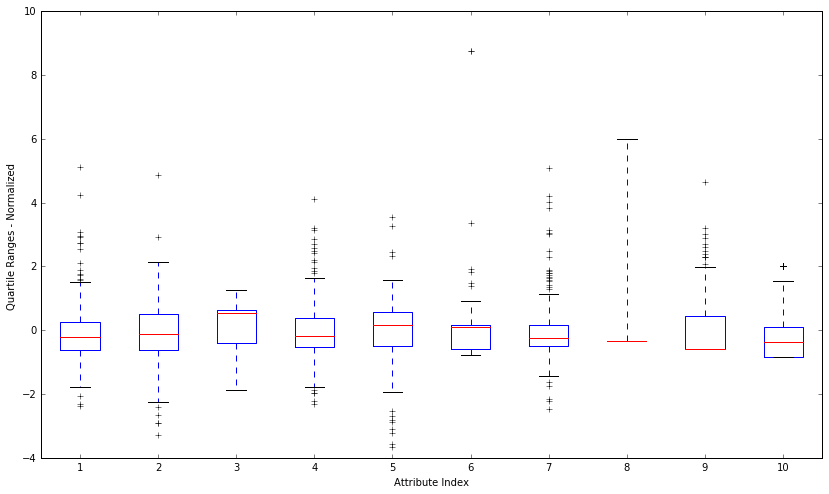

In [89]:
ncol1 = len(glass.columns)
glassNormalized = glass.iloc[:, 1:ncol1]
ncol2 = len(glassNormalized.columns)
summary2 = glassNormalized.describe()
for i in range(ncol2):
    mean = summary2.iloc[1, i]
    sd = summary2.iloc[2, i]
    glassNormalized.iloc[:,i:(i + 1)] = (glassNormalized.iloc[:,i:(i + 1)] - mean) / sd
array = glassNormalized.values
plt.figure(figsize=(14, 8))
plt.boxplot(array)
plt.xlabel("Attribute Index")
plt.ylabel(("Quartile Ranges - Normalized "))
plt.show()